## Assignment 2: Route Finder Using Bi-Directional BFS/DFS

**Objective**: Use Bi-directional BFS/DFS to solve a navigation problem

**Problem Statement**: Represent a City Map as a graph where intersections are nodes and roads are edges. Find the shortest path between two locations.

**Tasks**:
- Implement Bi-directional BFS to minimize the number of nodes explored.
- Compare the performance of Bi-directional BFS with standard BFS and DFS.
- Visualize the search process (e.g., using a library like networkx in Python).

In [10]:
import time
import networkx as nx
import matplotlib.pyplot as plt

In [11]:
edges = [
    (1, 2), (1, 3), (1, 4), (2, 3), (3, 4), (2, 6),
    (3, 5), (4, 7), (5, 6), (5, 7), (7, 8), (8, 5), (9, 8), (9, 6)
]

In [12]:
def build_graph(edge_list):
    graph = {}
    for u, v in edge_list:
        graph.setdefault(u, []).append(v)
        graph.setdefault(v, []).append(u)
    return graph

In [13]:
def bfs(graph, start, goal):
    start_time = time.perf_counter()
    visited = set([start])
    queue = [(start, [start])]
    while queue:
        node, path = queue.pop(0)
        if node == goal:
            print("BFS time (ms):", (time.perf_counter() - start_time)*1000)
            return path
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append((neighbor, path + [neighbor]))
    return None

In [14]:
def dfs(graph, start, goal):
    start_time = time.perf_counter()
    visited = set()
    stack = [(start, [start])]
    while stack:
        node, path = stack.pop()
        if node == goal:
            print("DFS time (ms):", (time.perf_counter() - start_time)*1000)
            return path
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                stack.append((neighbor, path + [neighbor]))
    return None

In [15]:
def bidirectional_bfs(graph, start, goal):
    start_time = time.perf_counter()
    front1, front2 = {start}, {goal}
    parents1, parents2 = {start: None}, {goal: None}
    while front1 and front2:
        new_front = set()
        for node in front1:
            for neighbor in graph[node]:
                if neighbor not in parents1:
                    parents1[neighbor] = node
                    new_front.add(neighbor)
                    if neighbor in front2:
                        print("Intersection node:", neighbor)
                        print("Bi-BFS time (ms):",(time.perf_counter()-start_time)*1000)
                        return reconstruct_path(parents1, parents2, neighbor)
        front1 = new_front
        new_front = set()
        for node in front2:
            for neighbor in graph[node]:
                if neighbor not in parents2:
                    parents2[neighbor] = node
                    new_front.add(neighbor)
                    if neighbor in front1:
                        print("Intersection node:", neighbor)
                        print("Bi-BFS time (ms):",(time.perf_counter()-start_time)*1000)
                        return reconstruct_path(parents1, parents2, neighbor)
        front2 = new_front
    return None

In [16]:
def reconstruct_path(parents1, parents2, intersect):
    path1, path2 = [], []
    node = intersect
    while node is not None:
        path1.append(node)
        node = parents1[node]
    node = intersect
    while node is not None:
        path2.append(node)
        node = parents2[node]
    path1.reverse()
    return path1 + path2[1:]

In [17]:
def draw_graph_with_path(edges, path, title):
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)
    plt.title(title)
    plt.show()

BFS time (ms): 0.017700003809295595


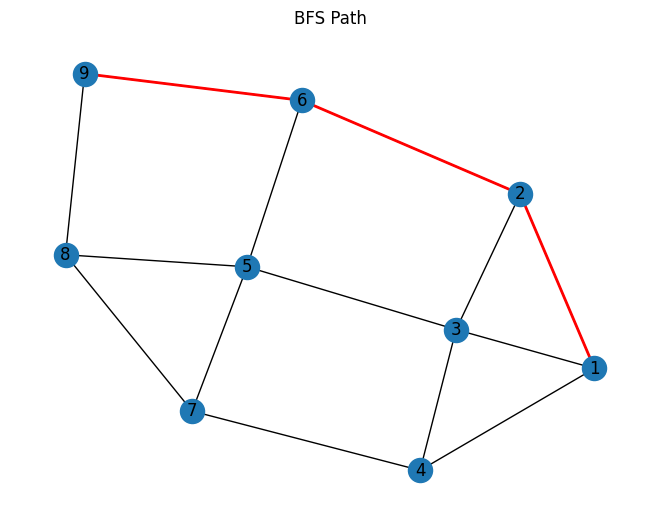

DFS time (ms): 0.012200005585327744


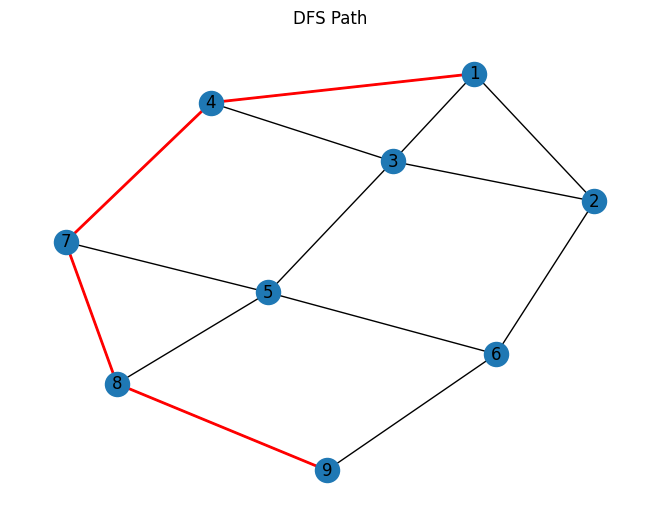

Intersection node: 6
Bi-BFS time (ms): 0.039399994420818985


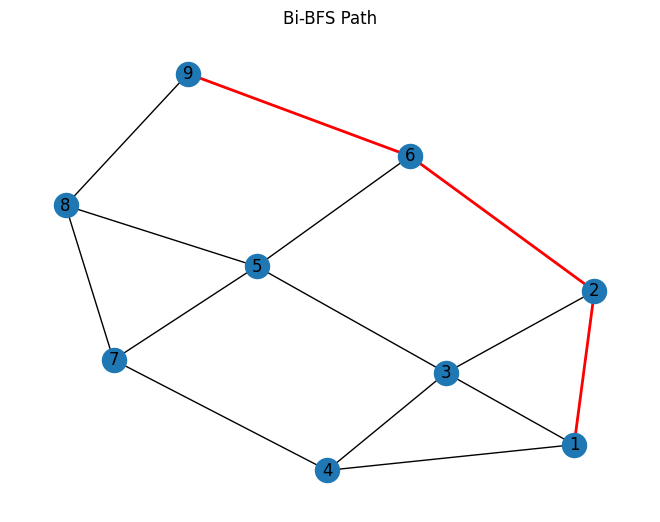

In [18]:
g = build_graph(edges)
bfs_path = bfs(g, 1, 9)
draw_graph_with_path(edges, bfs_path, "BFS Path")

dfs_path = dfs(g, 1, 9)
draw_graph_with_path(edges, dfs_path, "DFS Path")

bibfs_path = bidirectional_bfs(g, 1, 9)
draw_graph_with_path(edges, bibfs_path, "Bi-BFS Path")